# Comparison of Average Global Temperature

data sources, comparison, conclusions

In [1]:
# Set paths
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'DegreesOfClimateChange')))

In [2]:
# Imports
from grab_berkeley import grab_berkeley
from grab_noaa import grab_noaa
from grab_worldbank import grab_worldbank
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data sources
Blah blah blah

### NOAA 

In [3]:
df_noaa = grab_noaa()

In [4]:
df_noaa[0:6]

,Date,Tanomaly_C
0,1880-1-01,0.00
1,1880-2-01,-0.12
2,1880-3-01,-0.13
3,1880-4-01,-0.04
4,1880-5-01,-0.06
5,1880-6-01,-0.16


### World Bank

In [5]:
df_wb = grab_worldbank()

.......computing worldwide averages across all years...hang on!!!


In [6]:
df_wb[0:6]

,Date,Tabsolute_C
0,1901-01-01,19.002034
1,1902-01-01,18.882094
2,1903-01-01,18.925365
3,1904-01-01,18.835930
4,1905-01-01,18.877793
5,1906-01-01,18.951634


### Berkeley Earth

In [7]:
df_berkeley = grab_berkeley()

In [8]:
df_berkeley[0:6]

,Date,Tanomaly_C
0,1750-1-01,0.382
1,1750-2-01,0.539
2,1750-3-01,0.574
3,1750-4-01,0.382
4,1750-5-01,NaN
5,1750-6-01,NaN


## Comparison

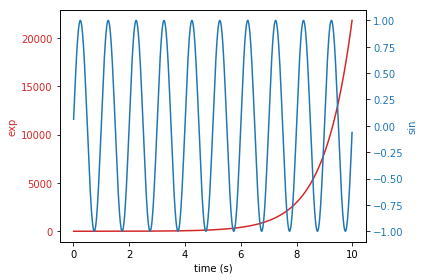

In [9]:
import numpy as np
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis



color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [10]:
# Combining Noaa and Berkeley data set 
df_berkeley_noaa = pd.merge(df_berkeley, df_noaa, on='Date', how="outer")

In [11]:
df_berkeley_noaa.head()

,Date,Tanomaly_C_x,Tanomaly_C_y
0,1750-1-01,0.382,NaN
1,1750-2-01,0.539,NaN
2,1750-3-01,0.574,NaN
3,1750-4-01,0.382,NaN
4,1750-5-01,NaN,NaN


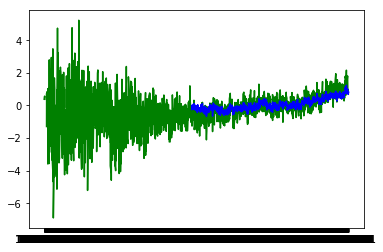

In [13]:
fig, ax1 = plt.subplots()

x = df_berkeley_noaa['Date']
y1 = df_berkeley_noaa['Tanomaly_C_x']
y2 = df_berkeley_noaa['Tanomaly_C_y']



ax1.plot(x, y1, 'g-')
ax1.plot(x, y2, 'b-')
plt.show()

## Conclusions

## References

Zhang, H.-M., B. Huang, J. Lawrimore, M. Menne, Thomas M. Smith, NOAA Global Surface Temperature Dataset (NOAAGlobalTemp), Version 4.0 NOAA Global Surface Temperature Data. NOAA National Centers for Environmental Information. doi:10.7289/V5FN144H [access date].
